In [574]:
import numpy as np
import xarray as xr
import pandas as pd

In [575]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 

In [576]:
import xarray as xr

# Replace with the path to your .nc file
dataset_path = "./vp/vp_1980subset.nc"
ds = xr.open_dataset(dataset_path)
print(ds['vp'])


<xarray.DataArray 'vp' (time: 365, lat: 135, lon: 166)> Size: 33MB
[8179650 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB 42.82 42.83 42.84 42.85 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.32 -80.31 -80.3 ... -78.69 -78.68 -78.67
  * time     (time) datetime64[ns] 3kB 1980-01-01T12:00:00 ... 1980-12-30T12:...


In [577]:
ds_cleaned = ds.sel(time=ds['time'].dt.month.isin(range(4,10)))
print(ds_cleaned)

<xarray.Dataset> Size: 16MB
Dimensions:  (lat: 135, lon: 166, time: 183)
Coordinates:
  * lat      (lat) float64 1kB 42.82 42.83 42.84 42.85 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.32 -80.31 -80.3 ... -78.69 -78.68 -78.67
  * time     (time) datetime64[ns] 1kB 1980-04-01T12:00:00 ... 1980-09-30T12:...
Data variables:
    vp       (time, lat, lon) float32 16MB ...
Attributes:
    regrid_method:  bilinear


<xarray.DataArray 'tmax' (lat: 134, lon: 165)> Size: 177kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 1kB 42.83 42.84 42.85 42.86 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.31 -80.3 -80.29 ... -78.69 -78.68 -78.67


Text(0, 0.5, 'Latitude')

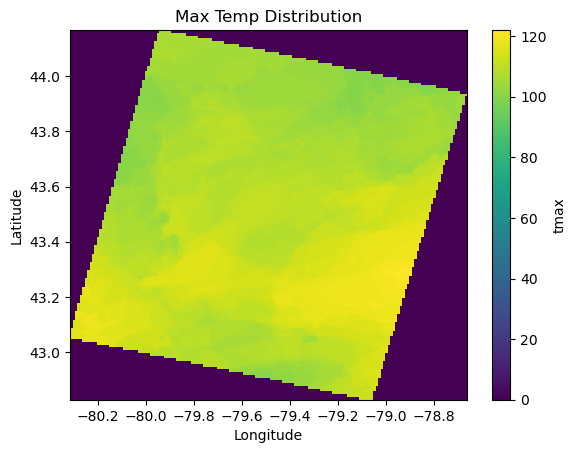

In [578]:
ds_tmax = xr.open_dataset("./tmax/tmax_1980subset.nc")
#Reducing Dataset to just April to October
# print(tmax_cleaned['lon'])
# print(tmax_cleaned['lat'])
# print(tmax_cleaned['tmax'])
# print(tmax_cleaned)
# for lat in tmax_cleaned['lat'].values:
#   print(lat)

# for log in tmax_cleaned['lon'].values:
#   print(log)
# Loop through each time point in the dataset
# Assuming ds_tmax is your xarray Dataset and it has been cleaned to include data from April to September

# Assuming ds_tmax is your xarray Dataset and 'tmax' is the data variable of interest
ds_tmax = xr.open_dataset("./tmax/tmax_1980subset.nc")

#filtered to summer
tmax_cleaned = ds_tmax.sel(time=ds['time'].dt.month.isin(range(4,10)))
# Use the .where() method to mask the dataset where 'tmax' values are greater than 25 degrees Celsius
# Then, use the .count() method to count the number of occurrences
# This function returns a lat and long map where all the values of T > 25 C
#Turns this into a 2d array by counting along the time dimension
days_over_25 = tmax_cleaned.where(ds_tmax['tmax'] > 20, drop=True)['tmax'].count(dim='time')

# 'days_over_25' is now a DataArray with the count of days where tmax > 25°C for each latitude and longitude
print(days_over_25)
days_over_25.plot()
plt.title('Max Temp Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


In [579]:
#Write algo to iterate over every single one
#Add feature 
import os

#Directory base path
d_path = './tmax'
start_year = 1980
end_year = 2010
# Store in the format {'year': Dataset}
dict_of_temp_values = {}

#Iterate through
for year in range(start_year, end_year + 1):
  #F string to concat into ospath
  file_name = f"tmax_{year}subset.nc"
  file_path = os.path.join(d_path, file_name)

  #Check if file exists
  if os.path.exists(file_path):
    #Read into file
    ds_max = xr.open_dataset(file_path)

    #Clean the dataset
    ds_cleaned = ds_tmax.sel(time=ds['time'].dt.month.isin(range(4,10)))

    #Normalize to 2Dims
    ds_cleaned_over_25 = ds_tmax.where(ds_tmax['tmax'] > 25, drop=True)['tmax'].count(dim='time')
    print(f"Processing {file_path}...")

    dict_of_temp_values[year] = ds_cleaned_over_25

    ds_max.close()
  

print(dict_of_temp_values)


Processing ./tmax/tmax_1980subset.nc...
Processing ./tmax/tmax_1981subset.nc...
Processing ./tmax/tmax_1982subset.nc...
Processing ./tmax/tmax_1983subset.nc...
Processing ./tmax/tmax_1984subset.nc...
Processing ./tmax/tmax_1985subset.nc...
Processing ./tmax/tmax_1986subset.nc...
Processing ./tmax/tmax_1987subset.nc...
Processing ./tmax/tmax_1988subset.nc...
Processing ./tmax/tmax_1989subset.nc...
Processing ./tmax/tmax_1990subset.nc...
Processing ./tmax/tmax_1991subset.nc...
Processing ./tmax/tmax_1992subset.nc...
Processing ./tmax/tmax_1993subset.nc...
Processing ./tmax/tmax_1994subset.nc...
Processing ./tmax/tmax_1995subset.nc...
Processing ./tmax/tmax_1996subset.nc...
Processing ./tmax/tmax_1997subset.nc...
Processing ./tmax/tmax_1998subset.nc...
Processing ./tmax/tmax_1999subset.nc...
Processing ./tmax/tmax_2000subset.nc...
Processing ./tmax/tmax_2001subset.nc...
Processing ./tmax/tmax_2002subset.nc...
Processing ./tmax/tmax_2003subset.nc...
Processing ./tmax/tmax_2004subset.nc...


In [580]:
print(dict_of_temp_values)
# for year in dict_of_temp_values.values:
#   print(year)

{1980: <xarray.DataArray 'tmax' (lat: 134, lon: 165)> Size: 177kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 1kB 42.83 42.84 42.85 42.86 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.31 -80.3 -80.29 ... -78.69 -78.68 -78.67, 1981: <xarray.DataArray 'tmax' (lat: 134, lon: 165)> Size: 177kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 1kB 42.83 42.84 42.85 42.86 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.31 -80.3 -80.29 ... -78.69 -78.68 -78.67, 1982: <xarray.DataArray 'tmax' (lat: 134, lon: 165)> Size: 177kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 

In [581]:
print(ds_tmax.time[364])

<xarray.DataArray 'time' ()> Size: 8B
array('1980-12-30T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 1980-12-30T12:00:00


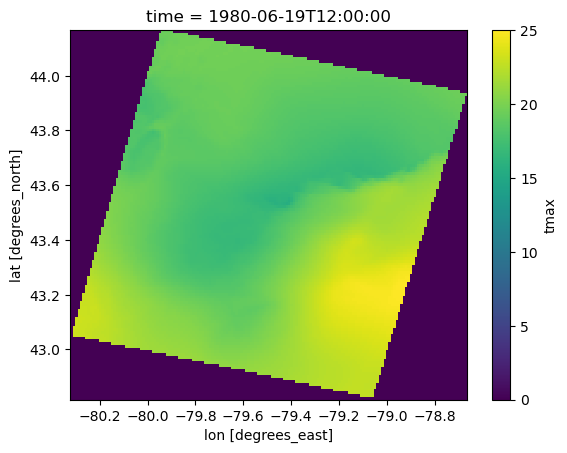

In [582]:
ds_tmax.isel(time = 170).tmax.plot()

In [583]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your Toronto shapefile
# toronto_map = gpd.read_file('path/to/toronto_shapefile.shp')

fig, ax = plt.subplots(figsize=(10, 6))
toronto_map.plot(ax=ax, edgecolor='black', facecolor='none')

# Overlay your data
# This assumes you've converted your data into a format compatible with matplotlib
# For complex data manipulations, consider rasterio to work with raster data and overlay it
# Plotting directly depends on your dataset's format and may require conversion or rasterization

ax.set_title('Toronto Map Overlay')
plt.show()


ModuleNotFoundError: No module named 'geopandas'